In [12]:
from google.colab import files
uploaded = files.upload()

X_scaled, data = load_data('/content/bank-full.csv')
print("Data shape:", X_scaled.shape)


Saving bank-full.csv to bank-full.csv
Data shape: (45211, 9)


In [13]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [14]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method)
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [15]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.

    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import LabelEncoder, StandardScaler

    df = pd.read_csv(filepath, sep=';')  # TODO: Load CSV with correct separator

    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing',
                       'loan', 'contact', 'month', 'poutcome', 'y']

    # TODO: Apply label encoding to categorical columns
    le_map = {}
    for col in categorical_cols:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            le_map[col] = le

    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education',
               'housing', 'loan', 'default']
    X = df[features].values  # TODO: Select features

    # TODO: Scale the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # TODO: Apply StandardScaler

    return X_scaled, df

# Load and preprocess the data
X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)


class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        import numpy as np
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        import numpy as np
        rng = np.random.RandomState(self.random_state)
        idx = rng.choice(X.shape[0], size=self.n_clusters, replace=False)
        return X[idx].astype(float)

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        import numpy as np
        dists = ((X[:, None, :] - self.centroids[None, :, :]) ** 2).sum(axis=2) ** 0.5
        return dists.argmin(axis=1)

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        import numpy as np
        new_centroids = self.centroids.copy()
        for k in range(self.n_clusters):
            mask = labels == k
            if mask.any():
                new_centroids[k] = X[mask].mean(axis=0)
        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        import numpy as np
        self.centroids = self._initialize_centroids(X)
        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.allclose(new_centroids, self.centroids, atol=1e-6):
                self.centroids = new_centroids
                self.labels = labels
                return self
            self.centroids = new_centroids
        self.labels = self._assign_clusters(X)
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


Data shape: (45211, 9)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

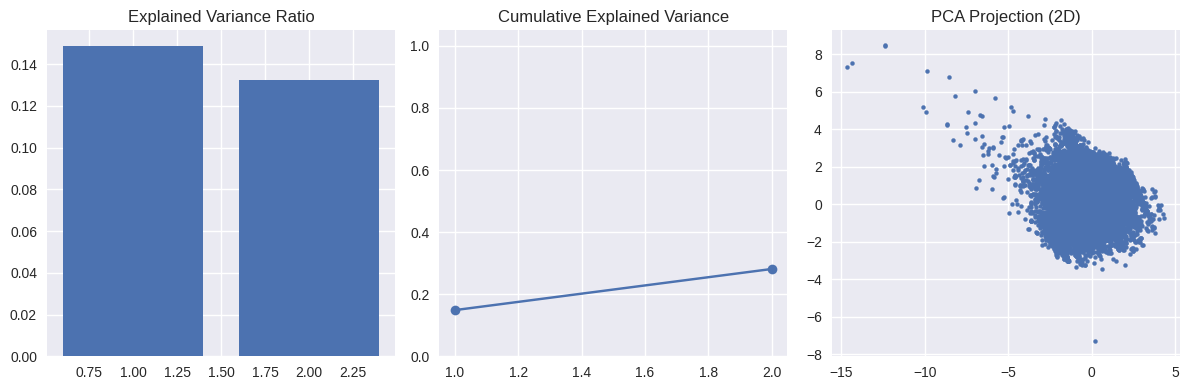

Shape after PCA: (45211, 2)


In [16]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.

    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    from sklearn.decomposition import PCA
    import numpy as np
    import matplotlib.pyplot as plt

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # TODO: Create visualization
    plt.figure(figsize=(12, 4))

    # Plot explained variance
    plt.subplot(1, 3, 1)
    evr = pca.explained_variance_ratio_
    plt.bar(range(1, n_components + 1), evr)
    plt.title('Explained Variance Ratio')

    plt.subplot(1, 3, 2)
    cev = np.cumsum(evr)
    plt.plot(range(1, n_components + 1), cev, marker='o')
    plt.title('Cumulative Explained Variance')
    plt.ylim(0, 1.05)

    # Plot data in 2D
    plt.subplot(1, 3, 3)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], s=8)
    plt.title('PCA Projection (2D)')
    plt.tight_layout()
    plt.show()

    return X_pca

# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

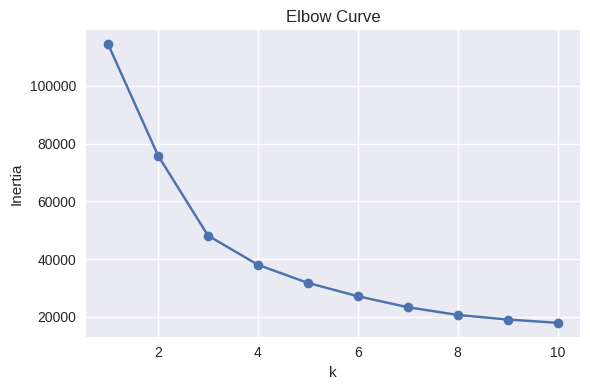


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [29]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).

    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    import numpy as np
    inertia = 0
    for k in range(centroids.shape[0]):
        mask = labels == k
        if mask.any():
            diff = X[mask] - centroids[k]
            inertia += (diff ** 2).sum()
    return float(inertia)

def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.

    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    import matplotlib.pyplot as plt
    inertias = []
    K = range(1, max_k + 1)

    # Calculate inertia for different k values
    for k in K:
        km = KMeansClustering(n_clusters=k, max_iters=100, random_state=42)
        km.fit(X)
        inertias.append(calculate_inertia(X, km.labels, km.centroids))

    # Create elbow plot
    plt.figure(figsize=(6, 4))
    plt.plot(list(K), inertias, marker='o')
    plt.title('Elbow Curve')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.tight_layout()
    plt.show()

    return inertias

# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)

# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)

# Visualize final results
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

plt.figure(figsize=(12, 4))

# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title('Final Clustering Results')
plt.legend()

# Plot evaluation metrics
plt.subplot(1, 2, 2)
plt.plot(range(1, len(inertias) + 1), inertias, marker='o')
plt.title('Inertia by k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")




In [30]:
from sklearn.metrics import silhouette_score

Ks = range(2, 11)
sil_scores = []

for k in Ks:
    km = KMeansClustering(n_clusters=k, max_iters=100, random_state=42)
    km.fit(X_pca)
    sil = silhouette_score(X_pca, km.labels)
    sil_scores.append(sil)

plt.figure(figsize=(6,4))
plt.plot(Ks, sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.tight_layout()
plt.show()


Cluster Size Bar Plot

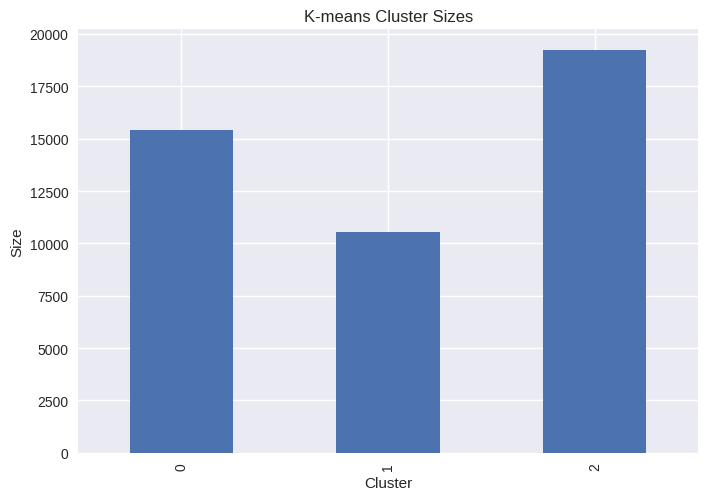

In [31]:
sizes = pd.Series(kmeans.labels).value_counts().sort_index()
sizes.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Size')
plt.title('K-means Cluster Sizes')
plt.show()


Silhouette Box Plot

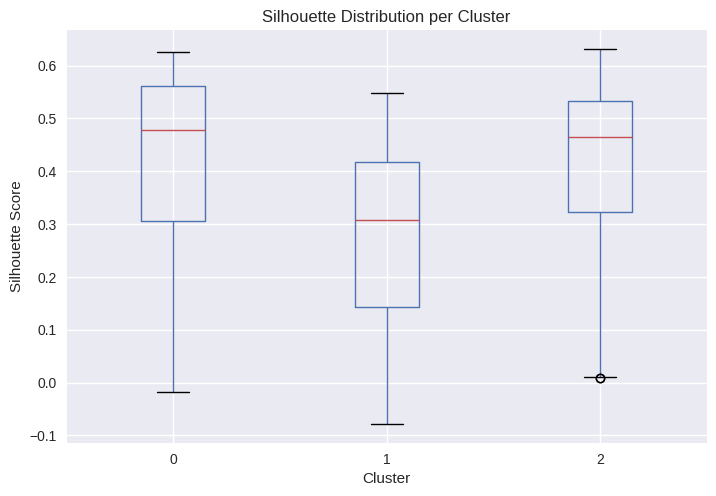

In [32]:
from sklearn.metrics import silhouette_samples

sil_vals = silhouette_samples(X_pca, kmeans.labels)
sv_df = pd.DataFrame({"label": kmeans.labels, "sil": sil_vals})

sv_df.boxplot(column="sil", by="label")
plt.title("Silhouette Distribution per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Silhouette Score")
plt.suptitle("")
plt.show()


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [19]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_`
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        import numpy as np
        from sklearn.cluster import KMeans

        n = X.shape[0]
        labels = np.zeros(n, dtype=int)
        next_label = 1

        rng = np.random.RandomState(self.random_state)

        while len(np.unique(labels)) < self.n_clusters:
            sizes = [(lab, (labels == lab).sum()) for lab in np.unique(labels)]
            sizes.sort(key=lambda t: t[1], reverse=True)
            parent = sizes[0][0]

            mask = labels == parent
            X_sub = X[mask]

            km2 = KMeans(n_clusters=2, n_init=10, random_state=rng.randint(1_000_000_000))
            sub_labels = km2.fit_predict(X_sub)

            child_a = parent
            child_b = next_label
            next_label += 1

            idxs = np.where(mask)[0]
            labels[idxs[sub_labels == 0]] = child_a
            labels[idxs[sub_labels == 1]] = child_b

            self.split_tree[parent] = (child_a, child_b)
            self.centers_[child_a] = km2.cluster_centers_[0]
            self.centers_[child_b] = km2.cluster_centers_[1]

        self.labels_ = labels
        return self.labels_


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!

1. K-Means++ Initialization

In [20]:
import numpy as np

def kmeans_plus_plus_init(X, n_clusters, random_state=42):
    rng = np.random.RandomState(random_state)
    n_samples, _ = X.shape

    centroids = []
    first_idx = rng.randint(0, n_samples)
    centroids.append(X[first_idx])

    for _ in range(1, n_clusters):
        dist_sq = np.min(((X[:, None, :] - np.array(centroids)[None, :, :]) ** 2).sum(axis=2), axis=1)
        probs = dist_sq / dist_sq.sum()
        chosen_idx = rng.choice(n_samples, p=probs)
        centroids.append(X[chosen_idx])

    return np.array(centroids)


In [21]:
km_pp = KMeansClustering(n_clusters=3)
km_pp.centroids = kmeans_plus_plus_init(X_scaled, 3)
km_pp.fit(X_scaled)


2. Cluster Interpretation (Top Feature Analysis)

In [22]:
import pandas as pd
import numpy as np

def cluster_summary(df, labels, top_n=5):
    df_local = df.copy()
    df_local['cluster'] = labels

    summaries = {}
    for c in sorted(df_local['cluster'].unique()):
        cluster_data = df_local[df_local['cluster'] == c].drop(columns=['cluster'])
        means = cluster_data.mean()
        top_features = means.abs().sort_values(ascending=False).head(top_n)
        summaries[c] = top_features

    return summaries

summaries = cluster_summary(data, kmeans.labels)
summaries


{np.int64(0): balance     691.043605
 duration    257.471546
 pdays        46.513464
 age          39.375316
 day          15.418532
 dtype: float64,
 np.int64(1): balance     2937.094298
 duration     260.448914
 age           52.785220
 pdays         27.331468
 day           16.016981
 dtype: float64,
 np.int64(2): balance     1037.442131
 duration     257.465341
 pdays         42.186199
 age           35.699932
 day           16.001558
 dtype: float64}

3. Manhattan Distance K-Means

In [23]:
class ManhattanKMeans:
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _init_centroids(self, X):
        rng = np.random.RandomState(self.random_state)
        idx = rng.choice(X.shape[0], size=self.n_clusters, replace=False)
        return X[idx]

    def _assign(self, X):
        dists = np.abs(X[:, None, :] - self.centroids[None, :, :]).sum(axis=2)
        return dists.argmin(axis=1)

    def _update(self, X, labels):
        new = np.zeros_like(self.centroids)
        for k in range(self.n_clusters):
            mask = labels == k
            if mask.any():
                new[k] = np.median(X[mask], axis=0)
        return new

    def fit(self, X):
        self.centroids = self._init_centroids(X)
        for _ in range(self.max_iters):
            labels = self._assign(X)
            new_centroids = self._update(X, labels)
            if np.allclose(new_centroids, self.centroids):
                break
            self.centroids = new_centroids
        self.labels = self._assign(X)
        return self



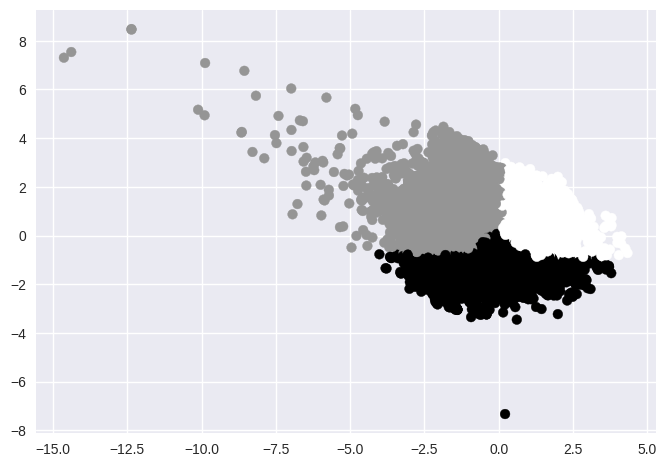

In [24]:
man_km = ManhattanKMeans(n_clusters=3)
man_km.fit(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c=man_km.labels)
plt.show()

4. Outlier Detection (Distance-Based)

In [25]:
import numpy as np

def detect_outliers(X, centroids, threshold=2.5):
    dists = np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)
    min_dist = dists.min(axis=1)

    mean = min_dist.mean()
    std = min_dist.std()

    z = (min_dist - mean) / std
    outliers = np.where(z > threshold)[0]

    return outliers, z

outliers, z_scores = detect_outliers(X_pca, kmeans.centroids)
len(outliers), outliers[:10]


(894, array([   4,  216,  217,  354,  446,  572,  838,  920,  932, 1223]))

Visualization:

In [26]:
plt.scatter(X_pca[:,0], X_pca[:,1], s=8, label='Points')
plt.scatter(X_pca[outliers,0], X_pca[outliers,1], color='red', s=20, label='Outliers')
plt.legend()
plt.show()
